# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

from os import listdir, path
import os
import math

import pandas as pd
import numpy as np
import datetime as dt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import lightgbm as lgb
from sklearn.externals import joblib
import joblib

from statsmodels.graphics.correlation import plot_corr

from sklearn import linear_model
import statsmodels.api as sm

from statsmodels.graphics.gofplots import qqplot

from scipy.stats import shapiro

from statsmodels.stats.outliers_influence import OLSInfluence as influence

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

/Users/stefanospindola/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Set options

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Prep

In [3]:
ls DADOS

DadosBO_2017_1(ROUBO DE VEÍCULOS).txt
DadosBO_2017_10(ROUBO DE VEÍCULOS).txt
DadosBO_2017_11(ROUBO DE VEÍCULOS).txt
DadosBO_2017_12(ROUBO DE VEÍCULOS).txt
DadosBO_2017_2(ROUBO DE VEÍCULOS).txt
DadosBO_2017_3(ROUBO DE VEÍCULOS).txt
DadosBO_2017_4(ROUBO DE VEÍCULOS).txt
DadosBO_2017_5(ROUBO DE VEÍCULOS).txt
DadosBO_2017_6(ROUBO DE VEÍCULOS).txt
DadosBO_2017_7(ROUBO DE VEÍCULOS).txt
DadosBO_2017_8(ROUBO DE VEÍCULOS).txt
DadosBO_2017_9(ROUBO DE VEÍCULOS).txt
DadosBO_2018_1(ROUBO DE VEÍCULOS).txt
DadosBO_2018_10(ROUBO DE VEÍCULOS).txt
DadosBO_2018_11(ROUBO DE VEÍCULOS).txt
DadosBO_2018_12(ROUBO DE VEÍCULOS).txt
DadosBO_2018_2(ROUBO DE VEÍCULOS).txt
DadosBO_2018_3(ROUBO DE VEÍCULOS).txt
DadosBO_2018_4(ROUBO DE VEÍCULOS).txt
DadosBO_2018_5(ROUBO DE VEÍCULOS).txt
DadosBO_2018_6(ROUBO DE VEÍCULOS).txt
DadosBO_2018_7(ROUBO DE VEÍCULOS).txt
DadosBO_2018_8(ROUBO DE VEÍCULOS).txt
DadosBO_2018_9(ROUBO DE VEÍCULOS).txt
DadosBO_2019_1(ROUBO DE VEÍCULOS).txt
DadosBO_2019_2(ROUBO DE VEÍCULOS).txt
DadosB

In [4]:
# read data
df = pd.read_csv('DADOS/final.csv', sep = ';')

In [5]:
# look head of dataframe
df.head()

,COUNT_NUM_BO,DATAOCORRENCIA,ANOMES,ANO,MES,DIA_DA_SEMANA,FERIADO,ID_PERIDOOCORRENCIA,ID_VITIMAFATAL,ID_FLAGRANTE,ID_LOGRADOURO,ID_BAIRRO,ID_CIDADE,LATITUDE,LONGITUDE,ID_DESCRICAOLOCAL,ID_NATURALIDADE,ID_NACIONALIDADE,ID_SEXO,IDADE,ID_ESTADOCIVIL,ID_PROFISSAO,ID_GRAUINSTRUCAO,ID_CORCUTIS,ID_UF_VEICULO,ID_CIDADE_VEICULO,ID_DESCR_COR_VEICULO,ID_DESCR_MARCA_VEICULO,ANO_MODELO
0,1.0,01/01/2017,201701.0,2017.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,439.0,474,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,76.0,2.0,444.0,2013.0
1,1.0,01/01/2017,201701.0,2017.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,440.0,398,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,16.0,3.0,445.0,2012.0
2,1.0,01/01/2017,201701.0,2017.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,98.0,423,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,446.0,2016.0
3,1.0,01/01/2017,201701.0,2017.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,96.0,168,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,2.0,14.0,6.0,134.0,2014.0
4,3.0,01/01/2017,201701.0,2017.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,157.0,423,NaN,NaN,7.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [6]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239820 entries, 0 to 239819
Data columns (total 29 columns):
COUNT_NUM_BO              238634 non-null float64
DATAOCORRENCIA            238634 non-null object
ANOMES                    122880 non-null float64
ANO                       238634 non-null float64
MES                       238634 non-null float64
DIA_DA_SEMANA             238634 non-null float64
FERIADO                   238634 non-null float64
ID_PERIDOOCORRENCIA       238634 non-null float64
ID_VITIMAFATAL            238634 non-null float64
ID_FLAGRANTE              238634 non-null float64
ID_LOGRADOURO             238634 non-null float64
ID_BAIRRO                 238634 non-null float64
ID_CIDADE                 238634 non-null object
LATITUDE                  217000 non-null object
LONGITUDE                 217000 non-null object
ID_DESCRICAOLOCAL         238634 non-null float64
ID_NATURALIDADE           238634 non-null float64
ID_NACIONALIDADE          238634 non-null f

In [9]:
# filter useful features
useful = ['MES','DIA_DA_SEMANA','FERIADO','ID_PERIDOOCORRENCIA','ID_VITIMAFATAL','ID_FLAGRANTE', 
            'ID_LOGRADOURO', 'ID_BAIRRO','ID_DESCRICAOLOCAL', 'ID_NATURALIDADE', 
            'ID_NACIONALIDADE','ID_SEXO', 'IDADE', 'ID_ESTADOCIVIL', 'ID_PROFISSAO',
            'ID_GRAUINSTRUCAO', 'ID_CORCUTIS', 'ID_UF_VEICULO', 'ID_CIDADE_VEICULO',
            'ID_DESCR_COR_VEICULO', 'ID_DESCR_MARCA_VEICULO', 'ANO_MODELO','COUNT_NUM_BO']

# features from useful to train model
features = ['MES','DIA_DA_SEMANA','FERIADO','ID_PERIDOOCORRENCIA','ID_VITIMAFATAL','ID_FLAGRANTE', 
            'ID_LOGRADOURO', 'ID_BAIRRO','ID_DESCRICAOLOCAL', 'ID_NATURALIDADE', 
            'ID_NACIONALIDADE','ID_SEXO', 'IDADE', 'ID_ESTADOCIVIL', 'ID_PROFISSAO',
            'ID_GRAUINSTRUCAO', 'ID_CORCUTIS', 'ID_UF_VEICULO', 'ID_CIDADE_VEICULO',
            'ID_DESCR_COR_VEICULO', 'ID_DESCR_MARCA_VEICULO', 'ANO_MODELO']

# label from useful to train model
label = 'COUNT_NUM_BO'

In [10]:
# dataframe with only useful features
df = df[useful]

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# drop rows with null values
df.dropna(inplace=True)

In [ ]:
# look head of dataframe
df.head()

In [12]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 191705 to 238293
Data columns (total 23 columns):
MES                       163 non-null float64
DIA_DA_SEMANA             163 non-null float64
FERIADO                   163 non-null float64
ID_PERIDOOCORRENCIA       163 non-null float64
ID_VITIMAFATAL            163 non-null float64
ID_FLAGRANTE              163 non-null float64
ID_LOGRADOURO             163 non-null float64
ID_BAIRRO                 163 non-null float64
ID_DESCRICAOLOCAL         163 non-null float64
ID_NATURALIDADE           163 non-null float64
ID_NACIONALIDADE          163 non-null float64
ID_SEXO                   163 non-null float64
IDADE                     163 non-null float64
ID_ESTADOCIVIL            163 non-null float64
ID_PROFISSAO              163 non-null float64
ID_GRAUINSTRUCAO          163 non-null float64
ID_CORCUTIS               163 non-null float64
ID_UF_VEICULO             163 non-null float64
ID_CIDADE_VEICULO         163 non-null fl

In [66]:
# function to split into train and test dataframes
def split_train_test(df, last_nyears):
    train = df[df.ANO<=df.ANO.nunique()-last_nyears]
    test  = df[df.ANO>df.ANO.nunique()-last_nyears]
    return train, test

In [14]:
# train and test dataframes
train, test = split_train_test(df, 1)

# Taking a peek at the relationship between the predicting variables and the response

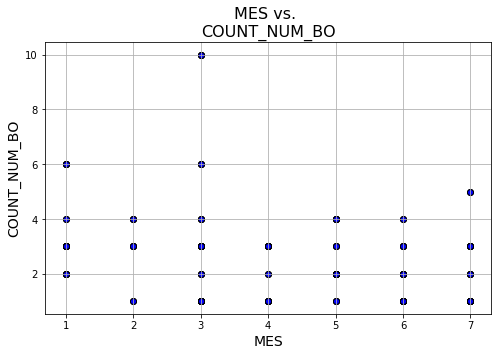

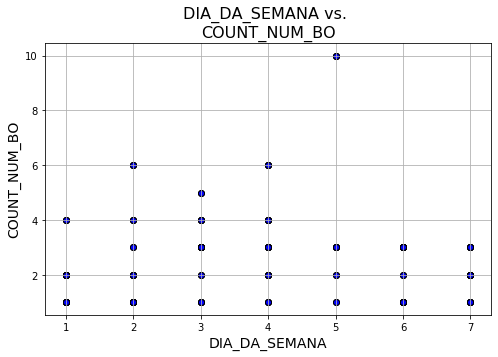

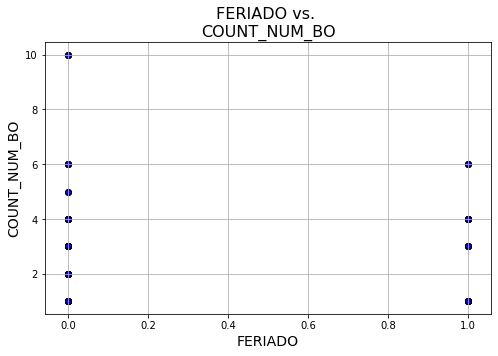

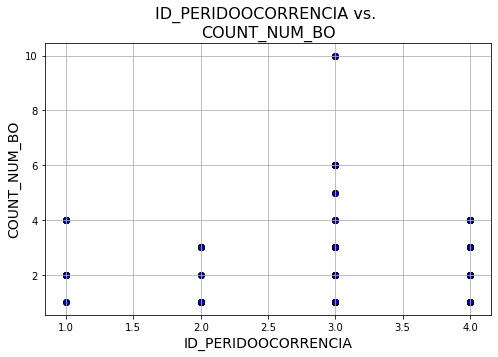

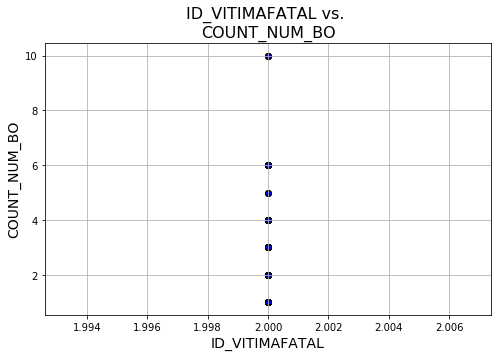

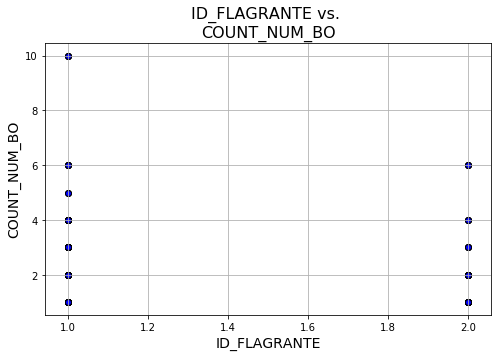

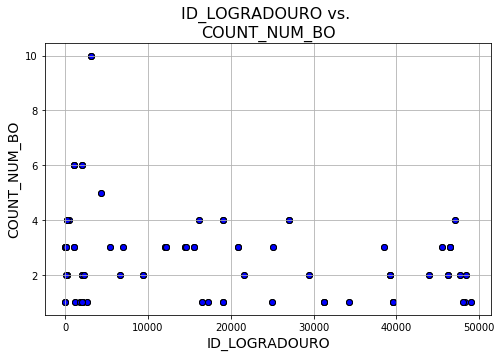

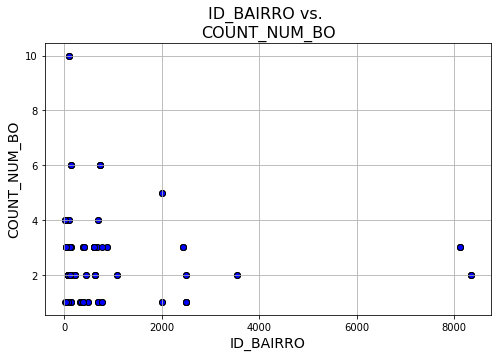

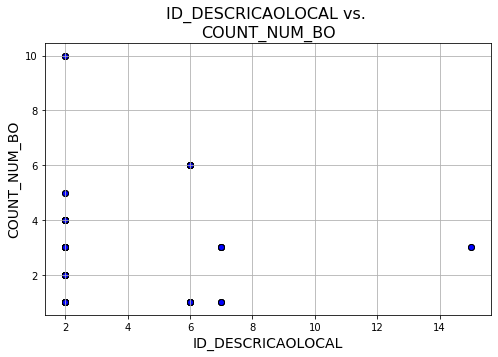

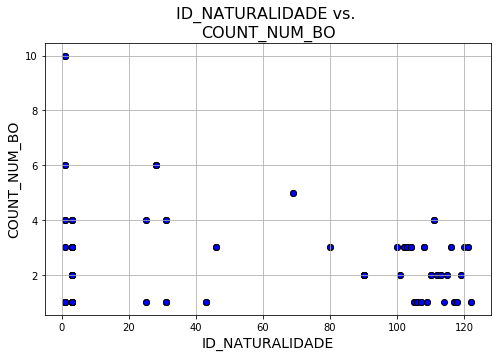

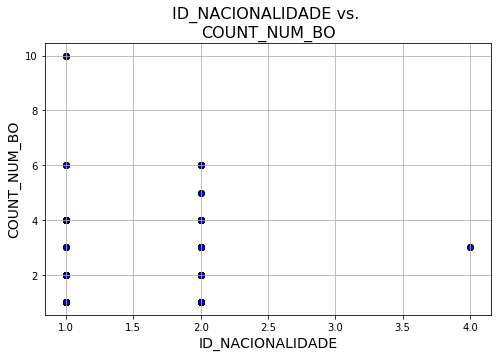

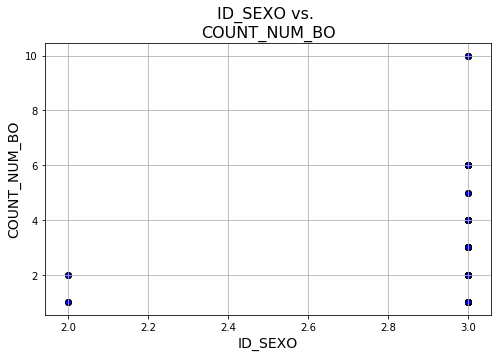

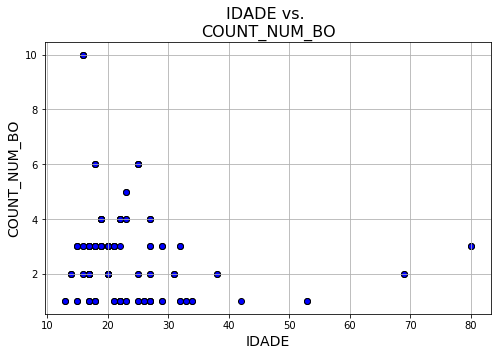

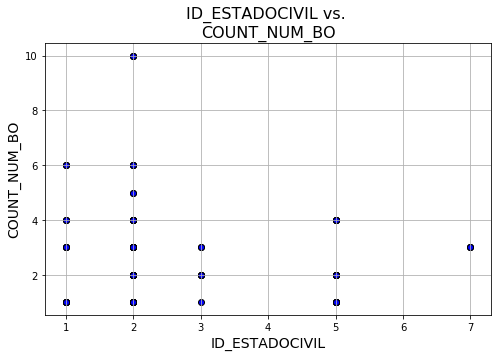

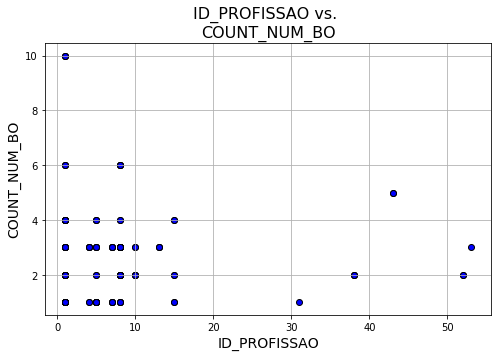

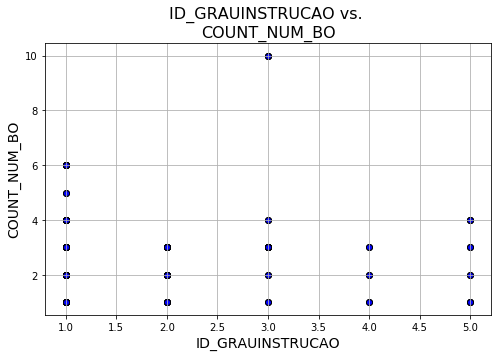

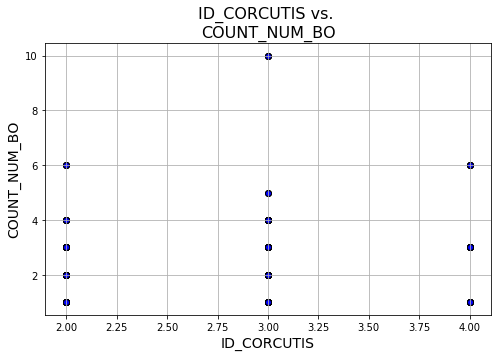

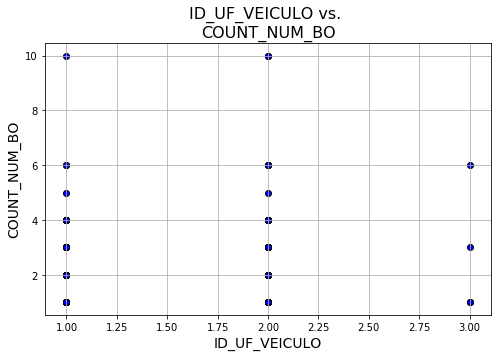

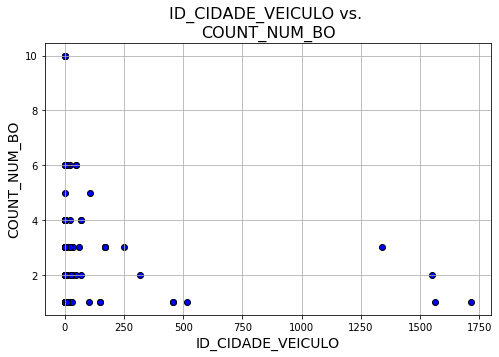

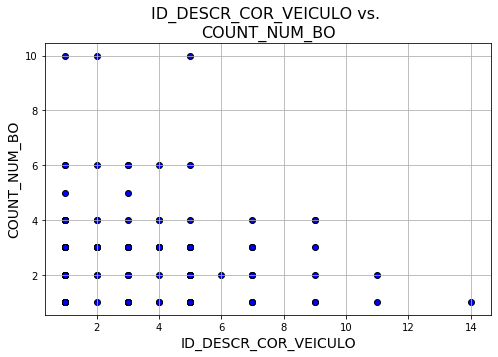

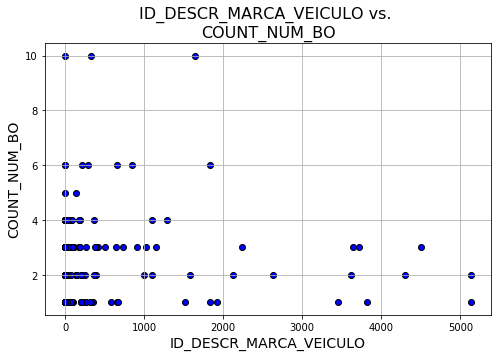

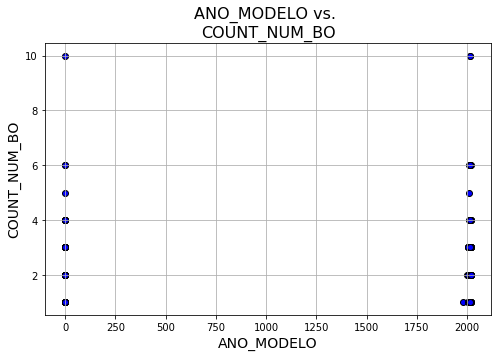

In [15]:
for c in train[features].columns:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nCOUNT_NUM_BO".format(c),fontsize=16)
    plt.scatter(x=train[c],y=train['COUNT_NUM_BO'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('COUNT_NUM_BO',fontsize=14)
    plt.show()

# Pairwise scatter plots

In [65]:
# g = sns.pairplot(data = train[features], markers='+')
# for i, j in zip(*np.triu_indices_from(g.axes, 1)):
#     g.axes[i, j].set_visible(False)

# Correlation matrix and heatmap to visually check for multicollinearity

In [17]:
corr = train[features].corr()

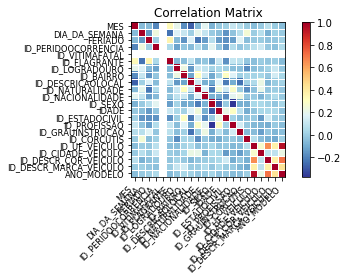

In [18]:
fig=plot_corr(corr,xnames=corr.columns)

# Construct and fit the model. Print summary of the fitted model

In [19]:
model=sm.OLS(endog=train[label], exog=train[features])

In [20]:
fitted = model.fit()

In [21]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:           COUNT_NUM_BO   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1.939
Date:                Sat, 14 Mar 2020   Prob (F-statistic):             0.0140
Time:                        18:53:13   Log-Likelihood:                -252.50
No. Observations:                 140   AIC:                             549.0
Df Residuals:                     118   BIC:                             613.7
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
MES                       -0

# A new result dataframe: p-values and statistical significance of the features

In [22]:
df_result=pd.DataFrame()

In [23]:
fitted.pvalues[:]

MES                       0.073525
DIA_DA_SEMANA             0.772771
FERIADO                   0.792089
ID_PERIDOOCORRENCIA       0.926075
ID_VITIMAFATAL            0.653148
ID_FLAGRANTE              0.641617
ID_LOGRADOURO             0.125871
ID_BAIRRO                 0.949724
ID_DESCRICAOLOCAL         0.257880
ID_NATURALIDADE           0.089189
ID_NACIONALIDADE          0.143067
ID_SEXO                   0.288827
IDADE                     0.203324
ID_ESTADOCIVIL            0.865013
ID_PROFISSAO              0.119662
ID_GRAUINSTRUCAO          0.175508
ID_CORCUTIS               0.639417
ID_UF_VEICULO             0.847079
ID_CIDADE_VEICULO         0.177583
ID_DESCR_COR_VEICULO      0.189009
ID_DESCR_MARCA_VEICULO    0.979046
ANO_MODELO                0.470082
dtype: float64

In [24]:
df_result['pvalues']=fitted.pvalues[:]

In [25]:
df_result['Features']=train[features].columns

In [26]:
df_result.set_index('Features',inplace=True)

In [27]:
def yes_no(p_value):
    if p_value < 0.01:
        return 'Yes'
    else:
        return 'No'

In [28]:
df_result['Statistically significant?']= df_result['pvalues'].apply(yes_no)

In [29]:
df_result

,pvalues,Statistically significant?
Features,,
MES,0.073525,No
DIA_DA_SEMANA,0.772771,No
FERIADO,0.792089,No
ID_PERIDOOCORRENCIA,0.926075,No
ID_VITIMAFATAL,0.653148,No
ID_FLAGRANTE,0.641617,No
ID_LOGRADOURO,0.125871,No
ID_BAIRRO,0.949724,No
ID_DESCRICAOLOCAL,0.257880,No


# Residuals vs. predicting variables plots

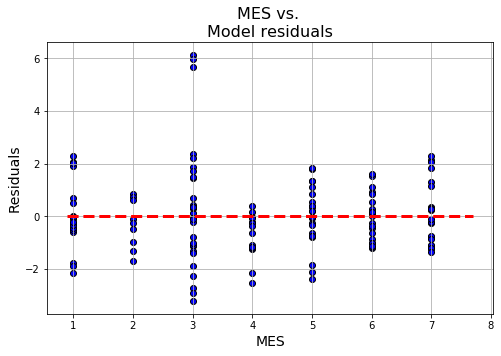

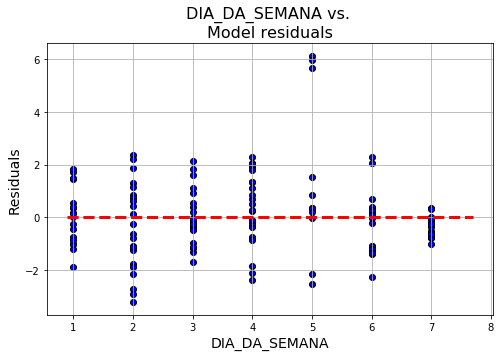

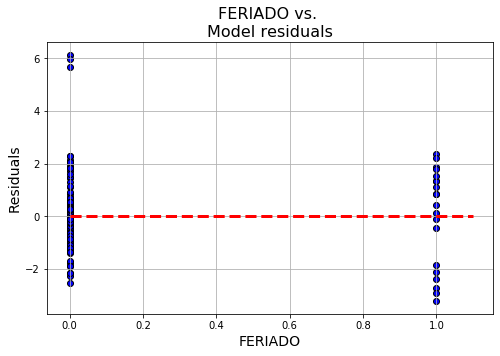

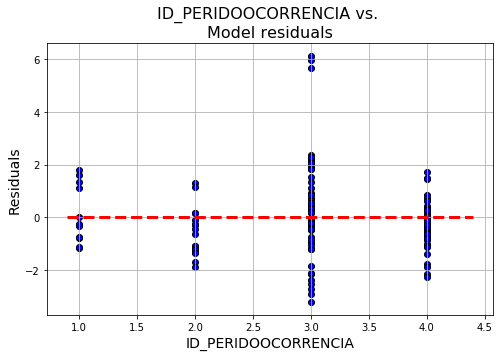

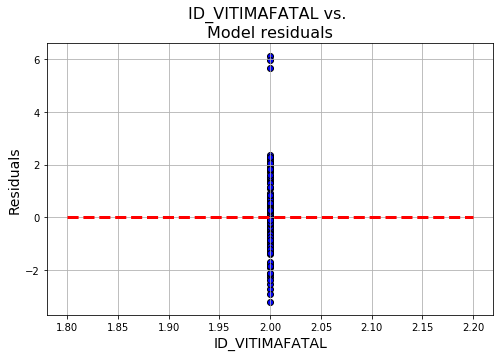

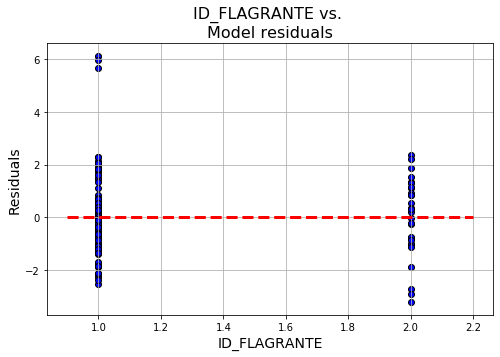

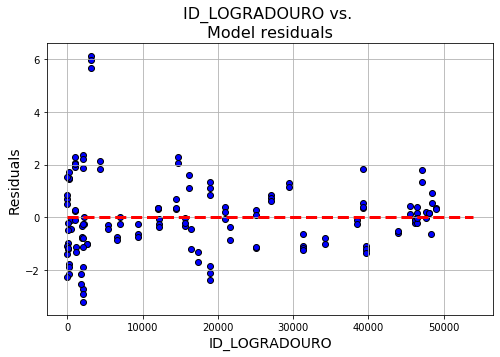

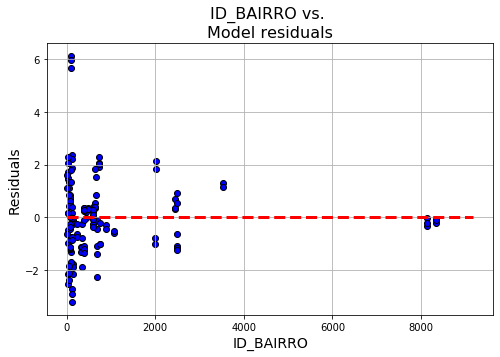

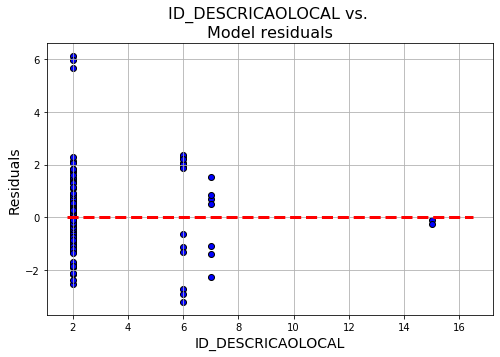

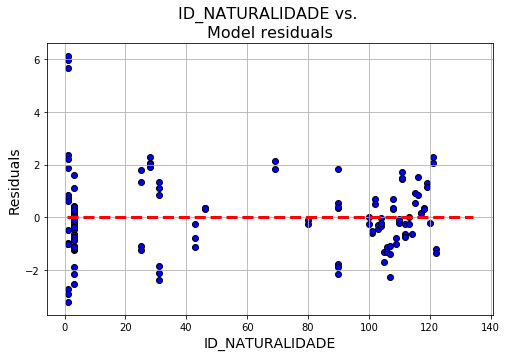

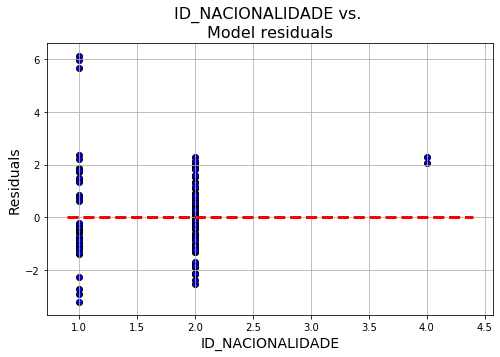

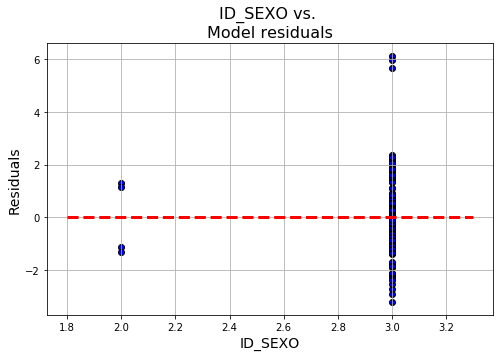

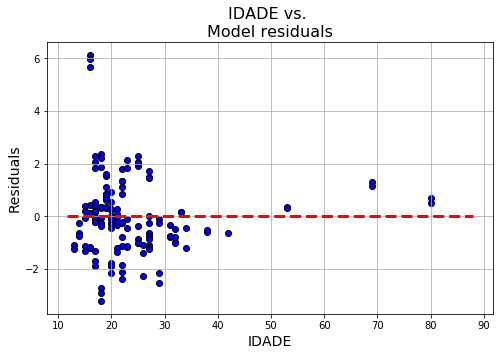

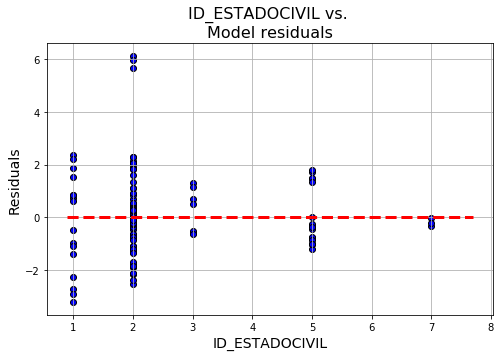

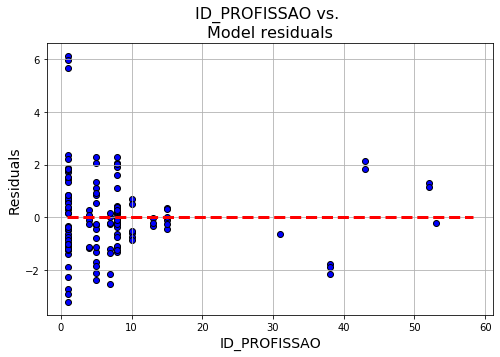

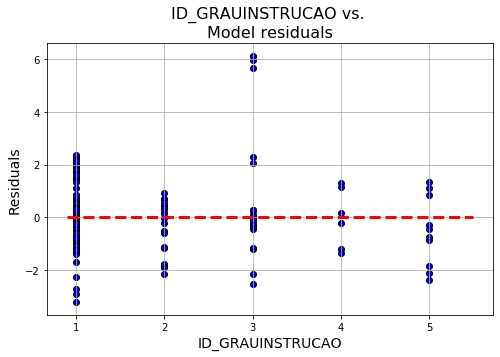

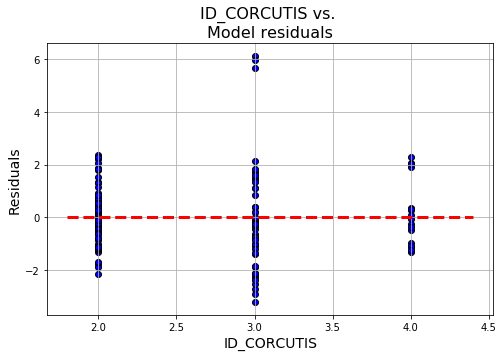

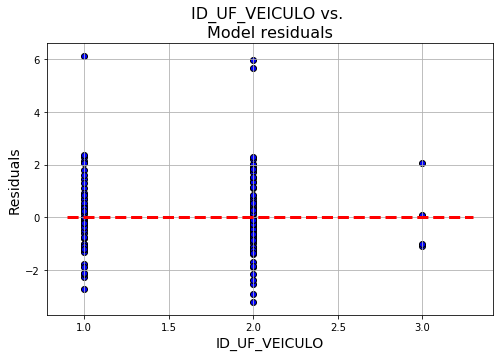

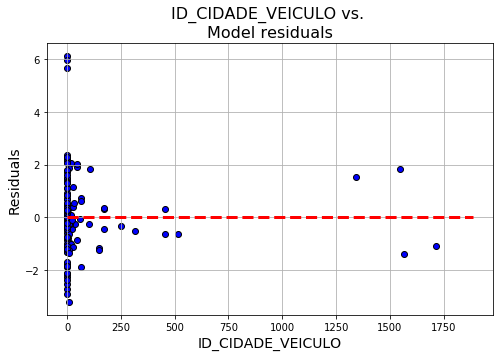

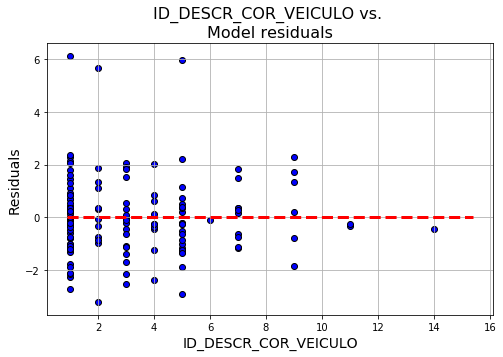

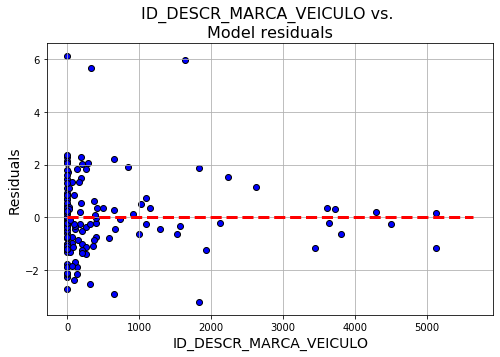

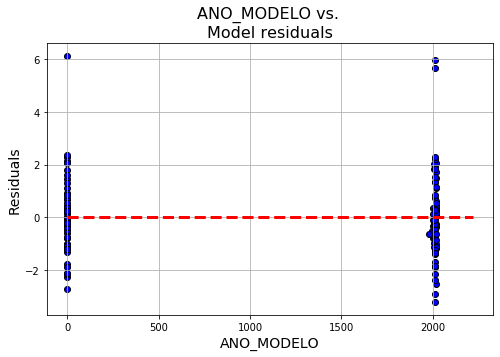

In [30]:
for c in train[features].columns:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=train[c],y=fitted.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(train[c])
    xmax = max(train[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

# Fitted vs. residuals

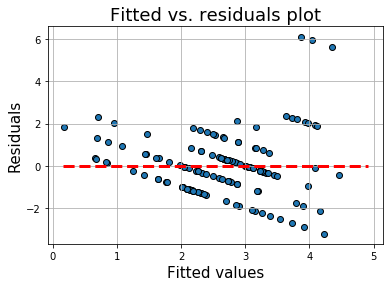

In [31]:
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

# Histogram of normalized residuals

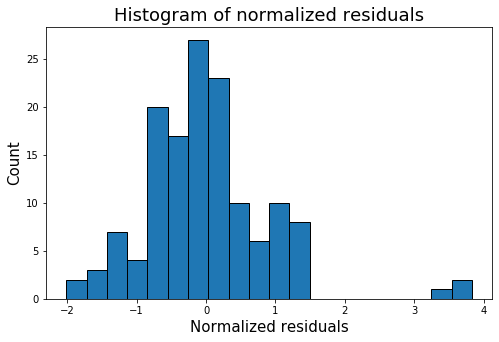

In [32]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

# Q-Q plot of the residuals

<Figure size 576x360 with 0 Axes>

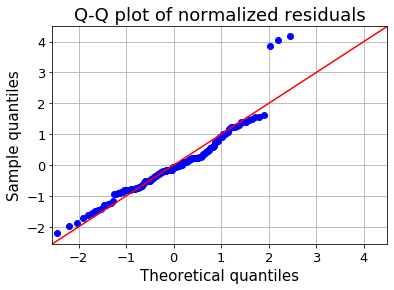

In [33]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

# Normality (Shapiro-Wilk) test of the residuals

In [34]:
_,p=shapiro(fitted.resid)

In [35]:
if p<0.01:
    print("The residuals seem to come from Gaussian process")
else:
    print("The normality assumption may not hold")

The residuals seem to come from Gaussian process


# Cook's Distance (checking for outliers in residuals)

In [36]:
inf=influence(fitted)

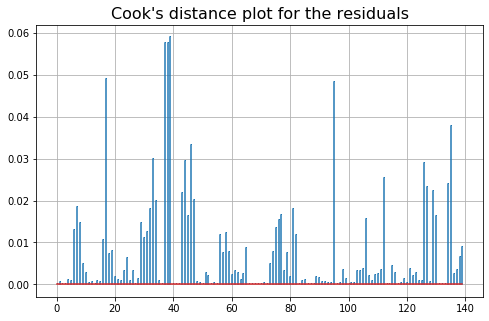

In [37]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()

# Variance inflation factor

In [38]:
for i in range(len(train[features].columns)):
    v=vif(np.matrix(train[features]),i)
    print("Variance inflation factor for {}: {}".format(train[features].columns[i],round(v,2)))

Variance inflation factor for MES: 1.8
Variance inflation factor for DIA_DA_SEMANA: 1.54
Variance inflation factor for FERIADO: 1.51
Variance inflation factor for ID_PERIDOOCORRENCIA: 1.36
Variance inflation factor for ID_VITIMAFATAL: 570.79
Variance inflation factor for ID_FLAGRANTE: 1.73
Variance inflation factor for ID_LOGRADOURO: 1.37
Variance inflation factor for ID_BAIRRO: 1.64
Variance inflation factor for ID_DESCRICAOLOCAL: 1.64
Variance inflation factor for ID_NATURALIDADE: 1.63
Variance inflation factor for ID_NACIONALIDADE: 1.36
Variance inflation factor for ID_SEXO: 1.37
Variance inflation factor for IDADE: 1.52
Variance inflation factor for ID_ESTADOCIVIL: 1.69
Variance inflation factor for ID_PROFISSAO: 1.53
Variance inflation factor for ID_GRAUINSTRUCAO: 1.34
Variance inflation factor for ID_CORCUTIS: 1.35
Variance inflation factor for ID_UF_VEICULO: 12.92
Variance inflation factor for ID_CIDADE_VEICULO: 1.35
Variance inflation factor for ID_DESCR_COR_VEICULO: 2.36
Varia

# Predict on test data with statsmodels fitted

In [61]:
predictions = fitted.predict(test[features])
predictions = np.rint(predictions)

In [62]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_true + 1) - np.log1p(y_pred + 1), 2)))

In [63]:
print("RMSlE of the validation set:",rmsle(test[label], predictions))
print("\nRMSE of the validation set in seconds:", np.sqrt(mean_squared_error(test[label], predictions)))

RMSlE of the validation set: 0.35451651798012535

RMSE of the validation set in seconds: 1.6016296049038141


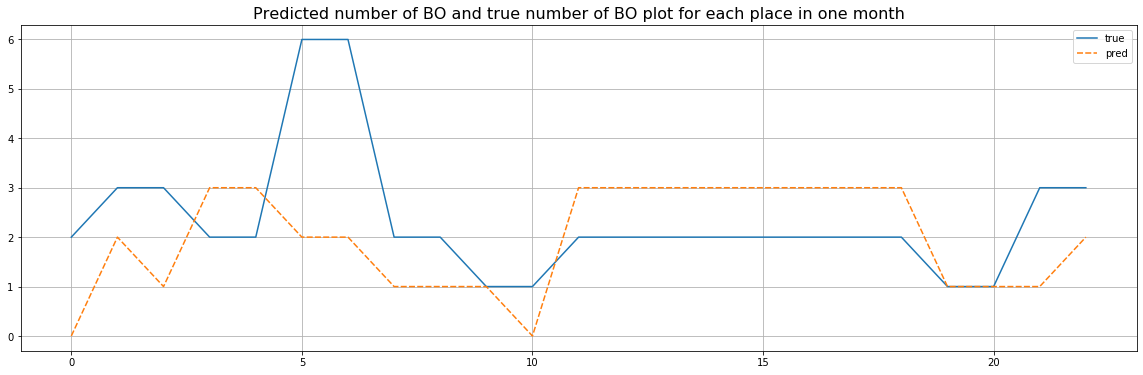

In [64]:
# prediction in dataframe
df_pred = pd.DataFrame({'true':test[label], 'pred':predictions}).reset_index(drop=True)
# compare prediction against true
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df_pred[:107])
plt.title("Predicted number of BO and true number of BO plot for each place in one month",fontsize=16)
plt.grid(True)
plt.show()

# Compare performance with LightGBM

In [43]:
train, test = split_train_test(df, 1)

# Traning LightGBM

In [44]:
def train_lgbm(train, train_labels):
    train_data = lgb.Dataset(train, label = train_labels)
    # Selecting hyperparameters
    params = {'boosting_type': 'gbdt',
              'max_depth' : -1,
              'objective': 'regression',
              'nthread': 5,
              'num_leaves': 64,
              'learning_rate': 0.07,
              'metric' : 'rmsle'
            }
    # Creating search parameters
    gridParams = {'max_depth' : [-1,6],
                  'learning_rate': [0.09,0.1],
                  'n_estimators': [100,1000],
                  'num_leaves': [64,100],
                  'boosting_type' : ['gbdt'],
                  'objective' : ['regression'],
                  'random_state' : [0], 
                  'colsample_bytree' : [0.63],
                  'subsample' : [0.7]
                }
    # Creating the classifier
    mdl = lgb.LGBMRegressor(boosting_type= params['boosting_type'],
                            objective = params['objective'],
                            n_jobs = -2,
                            max_depth = params['max_depth']
                            )
    # View the default model params:
    mdl.get_params().keys()
    # Create the grid
    grid = GridSearchCV(mdl, gridParams, verbose=0, cv=3, n_jobs=-2)
    # Run the grid
    grid.fit(train, train_labels)
    # Using parameters already set above, replace in the best from the grid search
    params['colsample_bytree'] = grid.best_params_['colsample_bytree']
    params['learning_rate'] = grid.best_params_['learning_rate']
    params['num_leaves'] = grid.best_params_['num_leaves']
    params['subsample'] = grid.best_params_['subsample']
    params['n_estimators'] = grid.best_params_['n_estimators']
    # Train model on selected parameters and number of iterations
    lgbm = lgb.train(params,
                     train_data,
                     verbose_eval= 0
                    )
    print('Done')
    return lgbm, lgb

In [45]:
lgbm, lgb = train_lgbm(train[features], train[label])

Done


/Users/stefanospindola/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Plot variable importances

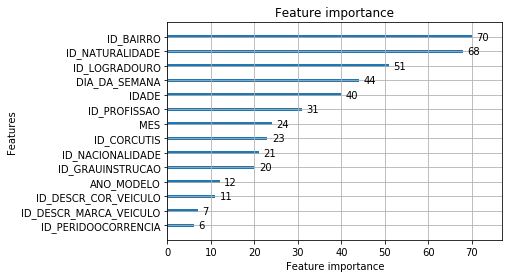

In [46]:
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

# Predict on test data with LightGBM fitted

In [53]:
def predict_lgbm(model, test):
    predictions = model.predict(test)
    return predictions

In [59]:
predictions = predict_lgbm(lgbm, test[features])
predictions = np.rint(predictions)

print("RMSlE of the validation set:",rmsle(test[label], predictions))
print("\nRMSE of the validation set in seconds:", np.sqrt(mean_squared_error(test[label], predictions)))

RMSlE of the validation set: 0.2355204330594784

RMSE of the validation set in seconds: 1.2683436648534627


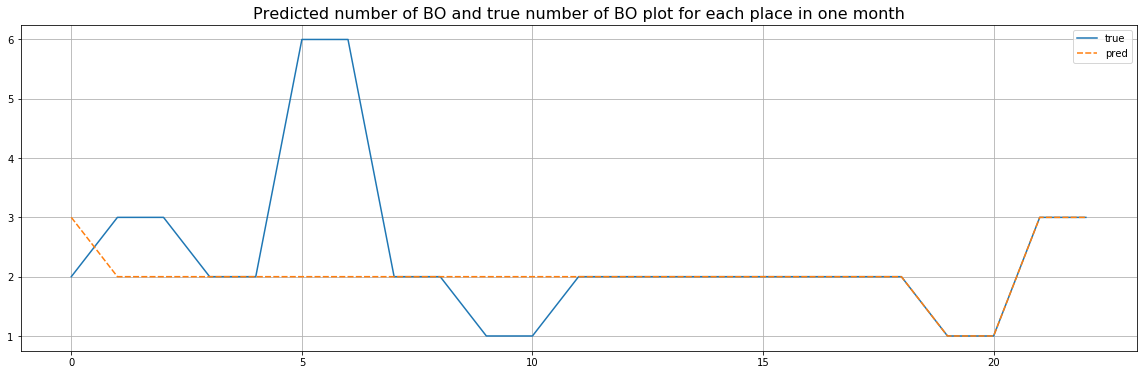

In [60]:
# prediction in dataframe
df_pred = pd.DataFrame({'true':test[label], 'pred':predictions}).reset_index(drop=True)
# compare prediction against true
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df_pred[:107])
plt.title("Predicted number of BO and true number of BO plot for each place in one month",fontsize=16)
plt.grid(True)
plt.show()